In [ ]:
# GENDER & HEIGHT DATA_SET
#1step
#importing the libraries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
#set to display all columns in datasets
pd.set_option("display.max_columns",None)
#to run queries on sql data frame
import pandasql as psql

In [8]:
#2step
#load the general dataset
Houtliers=pd.read_csv(r"C:\Users\R Sobha Supriya\Desktop\day2internship\Height-01.csv",header=0)
#copy to backup files
Houtliers_BK1=outliers.copy()
#claims_BK2=claims.copy()
#display first five records
Houtliers.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [9]:
#dispaly datset information
Houtliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
#dispaly shape of data set
Houtliers.shape

(10000, 2)

In [13]:
#display "descriptive statistical analysis"
Houtliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,66.36756,3.847528,54.263133,63.50562,66.31807,69.174262,78.998742


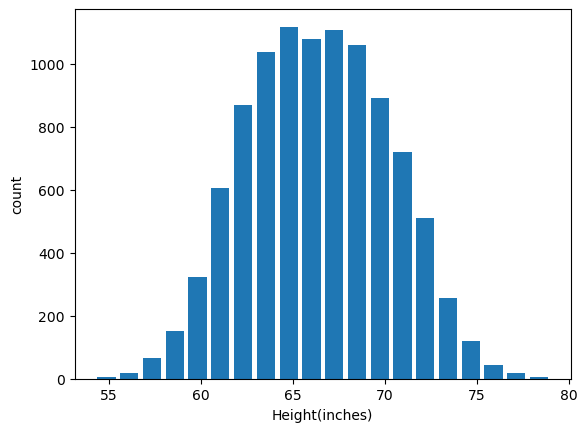

In [19]:
#plot histogram
plt.hist(Houtliers.Height,bins=20,rwidth=0.8)
plt.xlabel("Height(inches)")
plt.ylabel("count")
plt.show()

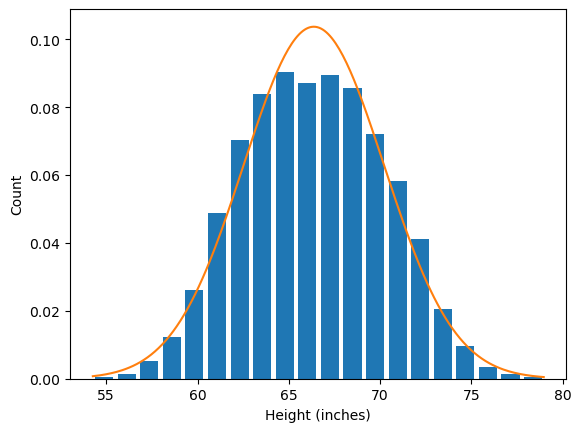

In [23]:

# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(Houtliers.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(Houtliers.Height.min(), Houtliers.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, Houtliers.Height.mean(),Houtliers.Height.std()))

In [24]:
Houtliers.Height.std()

3.847528120795573

In [26]:
upper_limit=round(Houtliers.Height.mean()+3 * Houtliers.Height.std(),3)
upper_limit

77.91

In [27]:
lower_limit=round(Houtliers.Height.mean()-3 * Houtliers.Height.std(),3)
lower_limit

54.825

In [28]:
print(Houtliers.Height.min())
print(Houtliers.Height.max())

54.26313333
78.99874235


In [33]:
#eliminate outlier and write data to new file
Houtliers_new=Houtliers[(Houtliers.Height>lower_limit) | (Houtliers.Height<upper_limit)]
Houtliers_new

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [32]:
#eliminate outlier and write data to new file
Houtliers_new=Houtliers[(Houtliers.Height>lower_limit) & (Houtliers.Height<upper_limit)]
Houtliers_new.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [35]:
METHOD_02=> ZScore
# Outlier detection and remove by using Z score (-3 to +3)
# Z score indicate how many standard deviation away a data point is
# Calculate the Z score = (X - m)/Sigma, where m = mean, Sigma = standard deviation

Houtliers['ZScore'] = (Houtliers.Height - Houtliers.Height.mean()) / Houtliers.Height.std()
Houtliers_new2 = Houtliers[(Houtliers.ZScore>-3) & (Houtliers.ZScore<3)]
Houtliers.shape[0]-Houtliers_new2.shape[0]

7

In [37]:
#outliers data
Houtliers_new2_O= Houtliers[(Houtliers.ZScore<-3) | (Houtliers.ZScore>3)]
Houtliers_new2_O

,Gender,Height,ZScore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [39]:
first_quantile=Houtliers["Height"].quantile(.25)
third_quantile=Houtliers["Height"].quantile(.75)
IQR=third_quantile- first_quantile

In [41]:
upper_bound=round(third_quantile +1.5 *IQR,3)
upper_bound

77.677

In [42]:
lower_bound=round(first_quantile -1.5 *IQR,3)
lower_bound

55.003

In [44]:
Houtliers[(Houtliers.Height<lower_bound) | (Houtliers.Height>upper_bound) ]

,Gender,Height,ZScore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
7294,Female,54.873728,-2.987329
9285,Female,54.263133,-3.146027
